In [206]:
import numpy as np
import matplotlib.pyplot as plt

In [207]:
X = np.array([
    [-1,-1],
    [1,1],
    [1,-1],
    [-1,1]
])

y = np.array([0,0,1,1])

n,m = X.shape
w = np.zeros(m)

In [208]:
def sigmoid(x):
    exp = np.exp(np.clip(-x, -100, 100))
    return 1 / (1+ exp)

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def loss_func(y, pred):
    epsilon = 1e-9  # To avoid log(0)
    pred = np.clip(pred, epsilon, 1 - epsilon)  # Ensure predictions are within (0, 1)
    return - (y * np.log(pred) + (1 - y) * np.log(1 - pred))

def backward(x, y, w, z1, a1):
    dL_da = a1 - y
    da_dz = sigmoid_derivative(z1)
    dz_dw = x

    dL_dw = np.dot(dL_da * da_dz, dz_dw)
    return dL_dw
dL_dw = backward(X, y, w, z1, a1)
dL_dw

array([0., 0.])

In [209]:
alpha = 1
epochs = 10000
losses = []
ws = []

for epoch in range(epochs):
    z1 = np.dot(w, X.T)
    a1 = sigmoid(z1)
     
    loss = np.sum(loss_func(y, a1))
    losses.append(loss)
    
    dL_dw = backward(X, y, w, z1, a1)
    
    w -= alpha * dL_dw


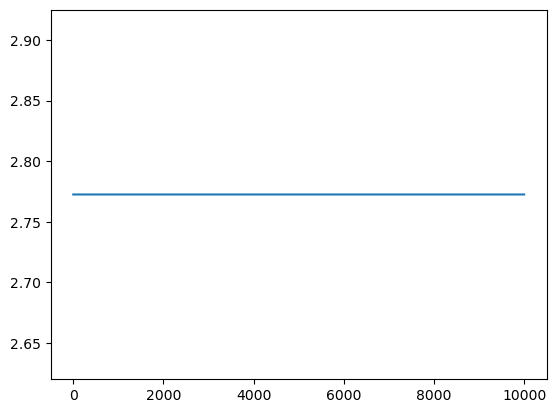

In [210]:
plt.plot(losses)
